In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,NaN
2,0.64,0.62,NaN,0.15,NaN,NaN,0.53,NaN
3,0.58,0.44,0.57,0.13,0.5,0.0,NaN,0.22
4,0.42,0.44,NaN,0.54,NaN,NaN,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,NaN,0.63,0.47,NaN,0.5,0.0,0.50,0.22
1480,NaN,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,NaN,0.47,0.50,0.14,NaN,0.0,0.53,0.37
1482,NaN,0.45,NaN,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	222
float64		column 2	74
float64		column 3	297
float64		column 4	222
float64		column 5	445
float64		column 6	371
float64		column 7	370
float64		column 8	371


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1262.000000,1410.000000,1187.000000,1262.000000,1039.000000,1113.000000,1114.000000,1113.000000
mean,0.499152,0.499979,0.500699,0.256236,0.504812,0.007610,0.501427,0.271096
std,0.131098,0.123141,0.082697,0.128672,0.048840,0.077248,0.053739,0.098241
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.010000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.300000,0.500000,0.000000,0.530000,0.280000
max,0.970000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

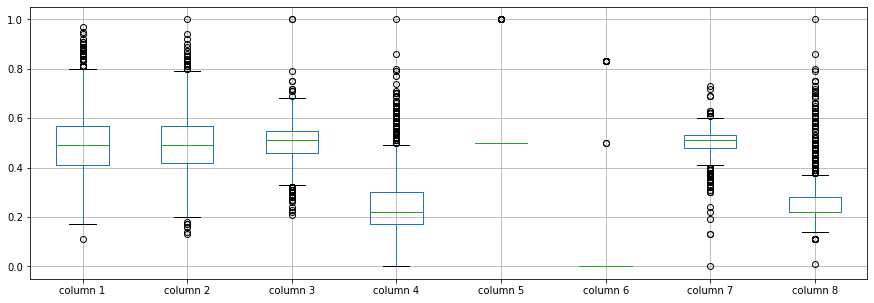

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.499152
column 2    0.499979
column 3    0.500699
column 4    0.256236
column 5    0.504812
column 6    0.007610
column 7    0.501427
column 8    0.271096
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.566439,-0.142259,0.149375,0.030800,-0.001309,0.045770,-0.157311
column 2,0.566439,1.000000,-0.258993,0.149119,0.092822,-0.026053,0.108803,-0.121309
column 3,-0.142259,-0.258993,1.000000,0.046365,0.028443,-0.016239,-0.207549,0.021058
column 4,0.149375,0.149119,0.046365,1.000000,0.008883,-0.015510,-0.118845,-0.085079
column 5,0.030800,0.092822,0.028443,0.008883,1.000000,-0.008169,-0.022448,0.007999
column 6,-0.001309,-0.026053,-0.016239,-0.015510,-0.008169,1.000000,0.017230,-0.048539
column 7,0.045770,0.108803,-0.207549,-0.118845,-0.022448,0.017230,1.000000,0.044129
column 8,-0.157311,-0.121309,0.021058,-0.085079,0.007999,-0.048539,0.044129,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+94,8+94+94,8+94+94+94,8+94+94+94+94,8+94+94+94+94+94,8+94+94+94+94+94+94,8+94+94+94+94+94,8+94+94+94+94,8+94+94+94,8+94+94,8+94,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.2202811098617055
Epoch: 1 , loss: 1.8927232687887938
Epoch: 2 , loss: 1.7684311089308367
Epoch: 3 , loss: 1.6627706237461255
Epoch: 4 , loss: 1.5540985387304556
Epoch: 5 , loss: 1.5091434224792148
Epoch: 6 , loss: 1.4309582632520925
Epoch: 7 , loss: 1.3778071105480194
Epoch: 8 , loss: 1.2999715513509253
Epoch: 9 , loss: 1.2793500546527945
Epoch: 10 , loss: 1.2337155335623284
Epoch: 11 , loss: 1.189970057943593
Epoch: 12 , loss: 1.1683427490617917
Epoch: 13 , loss: 1.131436213850975
Epoch: 14 , loss: 1.109458037044691
Epoch: 15 , loss: 1.0842521987531497
Epoch: 16 , loss: 1.0477897032447483
Epoch: 17 , loss: 1.0501881215883337
Epoch: 18 , loss: 1.0201484068580295
Epoch: 19 , loss: 0.9881120725818302
Epoch: 20 , loss: 0.9894572237263555
Epoch: 21 , loss: 0.9639688944039138
Epoch: 22 , loss: 0.971926453968753
Epoch: 23 , loss: 0.9338571643051894
Epoch: 24 , loss: 0.9318269912315451
Epoch: 25 , loss: 0.91

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.05780
2,0.000000,0.0,-0.200362,0.000000,-0.208529,-0.000047,0.000000,-0.04261
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.032783,0.00000
4,0.000000,0.0,0.113669,0.000000,0.095777,-0.000197,0.000000,0.00000
...,...,...,...,...,...,...,...,...
1479,-0.312543,0.0,0.000000,0.081626,0.000000,0.000000,0.000000,0.00000
1480,0.097251,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1481,-0.120719,0.0,0.000000,0.000000,-0.203708,0.000000,0.000000,0.00000
1482,0.011615,0.0,-0.088871,0.000000,0.000000,0.000000,0.000000,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(7.407428835455894, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.15792696006748527

In [18]:
new_df.iloc[66,:]

column 1    0.460000
column 2    0.490000
column 3    0.580000
column 4    0.230000
column 5    0.563334
column 6   -0.000271
column 7    0.440000
column 8    0.220000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.61,0.470000,0.130000,0.500000,0.000000,0.480000,0.22000
1,0.430000,0.67,0.480000,0.270000,0.500000,0.000000,0.530000,0.27780
2,0.640000,0.62,0.289638,0.150000,0.291471,-0.000047,0.530000,0.17739
3,0.580000,0.44,0.570000,0.130000,0.500000,0.000000,0.507217,0.22000
4,0.420000,0.44,0.593669,0.540000,0.595777,-0.000197,0.480000,0.22000
...,...,...,...,...,...,...,...,...
1479,0.507457,0.63,0.470000,0.261626,0.500000,0.000000,0.500000,0.22000
1480,0.447251,0.29,0.460000,0.140000,0.500000,0.000000,0.540000,0.66000
1481,0.289281,0.47,0.500000,0.140000,0.296292,0.000000,0.530000,0.37000
1482,0.521615,0.45,0.531129,0.250000,0.500000,0.000000,0.590000,0.22000


In [20]:
imputations[-1].to_excel("Yeast_NL_20(imp).xlsx", index=False, header=False)